In [2]:
# Author       : Divakara P M
# E-Mail       : divakarapm@gmail.com
# Contact      : +91-7019321437
# Designation  : Artificial Intelligence Engineer
# Decision Tree for Financial Loam EMI default detection

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

## Read the Data from the CSV

In [2]:
dummy_df = pd.read_csv("D:/ML/bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [3]:
dummy_df.where(dummy_df.job == 'NA')
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dummy_df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [9]:
dummy_df.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Data Pre-Processing

In [16]:
# columns_name = temp.split(';')
# data = dummy_df.values
# data

In [13]:
dummy_df.values

array([[59, 'admin.', 'married', ..., 0, 'unknown', 'yes'],
       [56, 'admin.', 'married', ..., 0, 'unknown', 'yes'],
       [41, 'technician', 'married', ..., 0, 'unknown', 'yes'],
       ...,
       [32, 'technician', 'single', ..., 0, 'unknown', 'no'],
       [43, 'technician', 'married', ..., 5, 'failure', 'no'],
       [34, 'technician', 'married', ..., 0, 'unknown', 'no']],
      dtype=object)

In [17]:
# contacts = list()
# for element in data:
#     contact = element[0]
#     contacts.append(contact)

# contact_df = pd.DataFrame(contacts,columns = columns_name)

# contact_df

In [5]:
res2 = dummy_df.copy();
le = preprocessing.LabelEncoder();
res2["job"] = le.fit_transform(res2["job"]);
res2["marital"] = le.fit_transform(res2["marital"]);
res2["default"] = le.fit_transform(res2["default"]);
res2["education"] = le.fit_transform(res2["education"]);
res2["housing"] = le.fit_transform(res2["housing"]);
res2["month"] = le.fit_transform(res2["month"]);
res2["loan"] = le.fit_transform(res2["loan"])
res2["contact"] = le.fit_transform(res2["contact"])
res2["day_of_week"] = le.fit_transform(res2["day"])
res2["poutcome"] = le.fit_transform(res2["poutcome"])
res2["deposit"] = le.fit_transform(res2["deposit"])

In [6]:
res2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,4


In [7]:
x = res2.drop(["default"],axis =1).values
y = res2["default"].values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [116]:
x_test


array([[47,  0,  1, ...,  1,  1, 11],
       [26,  0,  1, ...,  3,  1,  5],
       [29, 10,  2, ...,  0,  1, 22],
       ...,
       [34,  4,  2, ...,  3,  1, 20],
       [54,  6,  0, ...,  3,  0, 28],
       [39,  4,  1, ...,  3,  0, 17]], dtype=int64)

## Split the data into Train-Test

In [9]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9851047149736812
Testing score:  0.9843260188087775


## Build the Decision Tree Model

In [10]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.9851047149736812
Testing score:  0.9843260188087775


In [11]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.9855526934707134
Testing score:  0.9834303627407076


In [12]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.990704446186583
Testing score:  0.9798477384684281


In [13]:
#Decision tree
model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

## Graphical Representation of Tree

In [1]:
plt.figure(figsize=(6,6))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


## Performance Metrics

In [2]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [3]:
predictions = model_dt.predict(x_test)

# Model Accuracy
print (model_dt.score(x_test, y_test))
y_actual_result = y_test[0]

In [99]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

## Recall

In [4]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

## Area Under the Curve

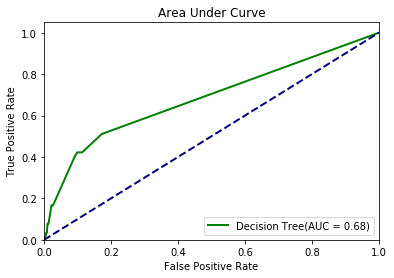

In [101]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [18]:
print (confusion_matrix(y_test, predictions))

[[19133   794]
 [ 1582  1097]]


In [19]:
accuracy_score(y_test, predictions)

0.894895160576838

In [20]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

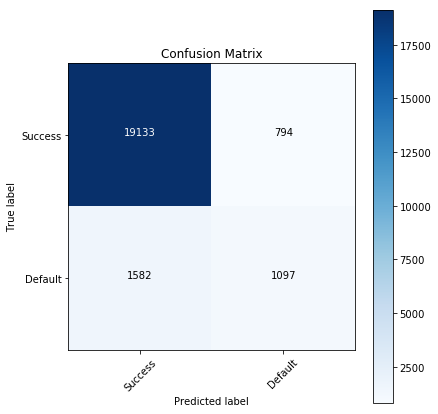

In [21]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Pruning of the tree

In [22]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(model_dt.tree_.children_left < 0))
# start pruning from the root
prune_index(model_dt.tree_, 0, 5)
sum(model_dt.tree_.children_left < 0)

#It means that the code has created 17 new leaf nodes 
#(by practically removing links to their ancestors). The tree, which has looked before like

169


188

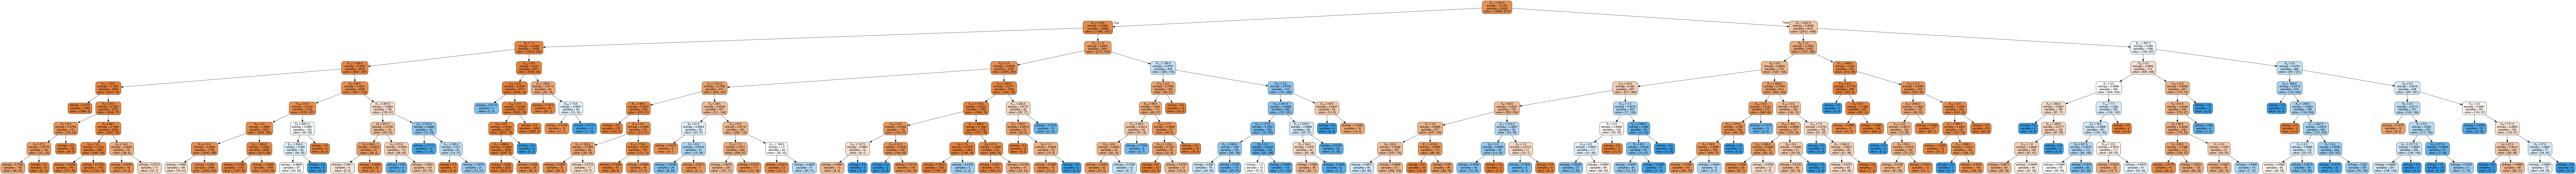

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
plt.figure(figsize=(6,6))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
